In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression, SGDRegressor

In [58]:
np.random.seed(42)
m=100
x=np.random.randn(m,1)
y=3+4*x+np.random.randn(m,1)
# print(x)
print(np.shape(x))
# print(y)

(100, 1)


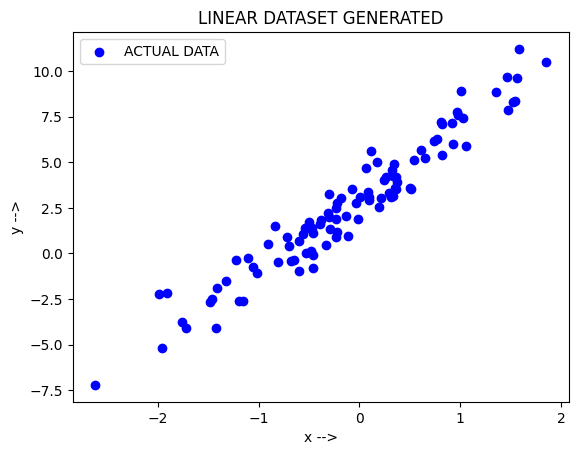

In [59]:
plt.scatter(x,y,color="blue",label="ACTUAL DATA")
plt.xlabel("x -->")
plt.ylabel("y -->")
plt.title("LINEAR DATASET GENERATED")
plt.legend()
plt.show()

In [71]:
x_b=add_dummy_feature(x,1) # bias term to make matrix multiplication valid => (mx1)@(2x1) not works so mx2
theta=np.linalg.inv(x_b.T @ x_b) @ (x_b.T @ y) # normal eq => way 1 of solving linear reg
print(theta)

[[3.00742783]
 [3.85674284]]


In [72]:
x_new=np.array([[-2],[2]])
# x_new = np.linspace(-2, 2, 100).reshape(-1, 1) # generates 100 data between -2 and 2 and makes it column vector
x_new_b=add_dummy_feature(x_new,1)
y_pred=x_new_b @ theta
# print(y_pred)

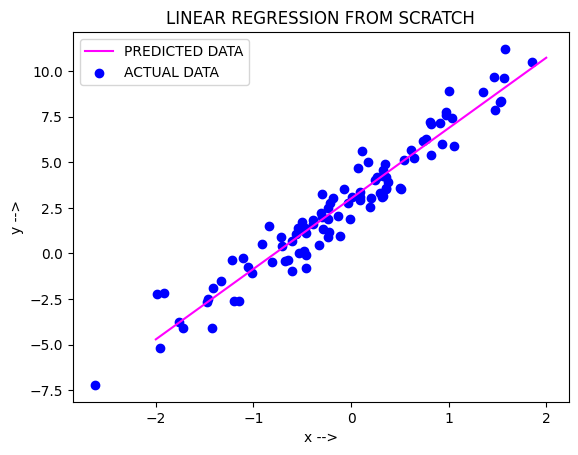

In [73]:
plt.plot(x_new,y_pred,"magenta",label="PREDICTED DATA")
plt.scatter(x,y,color="blue",label="ACTUAL DATA")
plt.xlabel("x -->")
plt.ylabel("y -->")
plt.title("LINEAR REGRESSION FROM SCRATCH")
plt.legend()
plt.show()

In [ ]:
# prediction using scikit learn's LinearRegression
l_r=LinearRegression()
l_r.fit(x,y)
print("Intercept:", l_r.intercept_) # theta0
print("Slope:", l_r.coef_) # theta1
y_sk_pred=l_r.predict(x_new)

Intercept: [3.00742783]
Slope: [[3.85674284]]


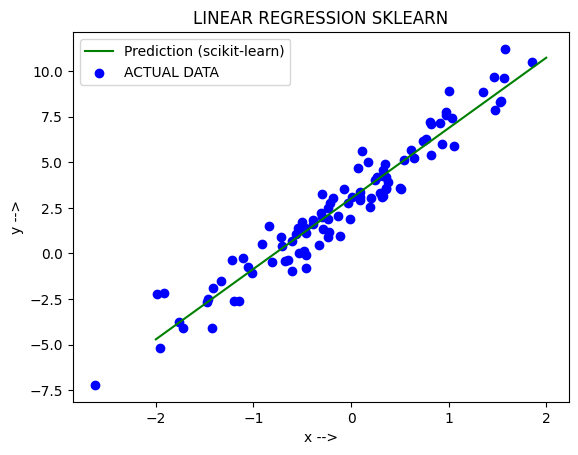

In [75]:
plt.plot(x_new, y_sk_pred, "g-", label="Prediction (scikit-learn)")
plt.scatter(x,y,color="blue",label="ACTUAL DATA")
plt.xlabel("x -->")
plt.ylabel("y -->")
plt.title("LINEAR REGRESSION SKLEARN")
plt.legend()
plt.show()

In [77]:
# theta using moore penrose pseudo inverse
theta_pinv = np.linalg.pinv(x_b) @ y
print("Theta from Pseudo-Inverse:", theta_pinv)

Theta from Pseudo-Inverse: [[3.00742783]
 [3.85674284]]


In [76]:
# theta using least-squares solution
theta_lstsq, residuals, _, _ = np.linalg.lstsq(x_b, y, rcond=None)
print("Theta from lstsq:", theta_lstsq)
print("Residuals:", residuals)

Theta from lstsq: [[3.00742783]
 [3.85674284]]
Residuals: [88.36324823]


In [80]:
x_b = add_dummy_feature(x)  # shape (100, 2)
y = y.reshape(-1,1) # column vector (not arr) => -1 lets it choose no. of rows based on no. of column (1)
m = x_b.shape[0] # (100,1)[0] = 100

In [91]:
# Initialize theta, learning rate, and iterations 
theta_gd=np.random.randn(2,1) # starting guess for intercept + slope.
learning_rate=0.1 # how fast the model learns
n_iterations=1000 # how many steps model takes

# batch gradient descent
for iteration in range(n_iterations):
    gradients = (2/m) * x_b.T @ (x_b @ theta_gd - y)
    theta_gd -= learning_rate * gradients
print("Theta from Gradient Descent:", theta_gd)

Theta from Gradient Descent: [[3.00742783]
 [3.85674284]]


In [89]:
# stochastic gradient descent
sgd = SGDRegressor(learning_rate="constant", eta0=0.1, max_iter=1000, penalty=None, random_state=42)
sgd.fit(x,y.ravel())
print("Intercept (SGD):", sgd.intercept_)
print("Coefficient (SGD):", sgd.coef_)

Intercept (SGD): [3.08139086]
Coefficient (SGD): [4.19170256]


In [90]:
y_sgd_pred = sgd.predict(x_new)

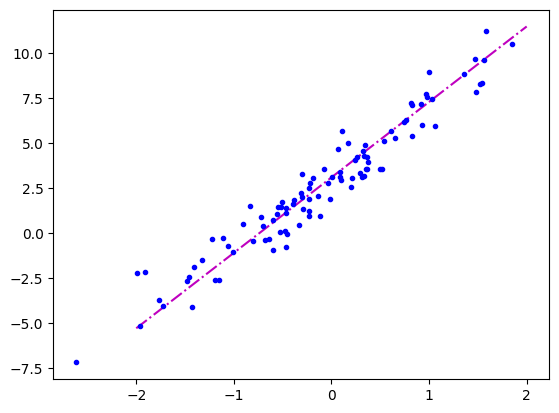

In [87]:
plt.plot(x_new, y_sgd_pred, "m-.", label="Prediction (SGD)")
plt.plot(x, y, "b.", label="Actual Data")
plt.show()